## Import libraries

In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
sys.path.append("myfun/")
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.full.myfun_model_nn import *
from ipynb.fs.defs.myfun_plot import *

2023-09-10 16:50:28.536794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


## Data Acquisition

In [2]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"
processed_flag = 'post'
merged_df, dflist = load_dataset(dir_name, processed_flag)

## Create the model NN

In [3]:
# Create the model
DOE =[[1,2,1]] #Design of experiment
model = create_model(DOE[0])

## Get $v_{0}$ mean over each df looping on dflist

In [4]:
# params
v0_guess = 30
NUM_ITER = 10
LEARNING_RATE_v0 = 0.5
flag_save = False

In [5]:
dataset = dflist[7:9]

----------------------------------------------------------------------------------------------------
****************************************************************************************************
In df n.8/2 we have 21 scenes
df n.8, scene n.0/21
    We have 3 time intervals inside [36.44,37.04]
            - Time interval n.0: [36.44, 36.64]
                * y_true: [16.4303266   8.20020738]
                * v_ann: [2.072227716445923, 11.568022727966309, 26.62274285245778]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [36.64, 36.84]
                * y_true: [18.55044671  6.80018642]
                * v_ann: [1.6719166040420532, 13.490245819091797, 26.62274285245778]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [36.84, 37.04]
                * y_true: [12.9262384  10.75446129]
                * v_ann:

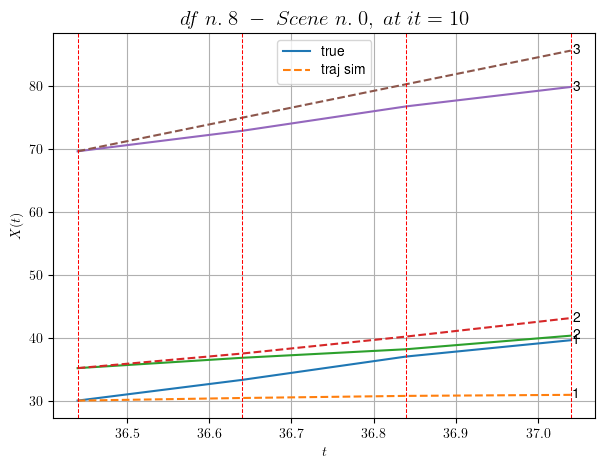

        For scene 0/21
        * use LR_NN=0.001 with err=17.49182365394421 at it=24
        * v0_scn_mean = 28.235161549022195
        * MAE = 15.383491803361773



df n.8, scene n.1/21
    We have 4 time intervals inside [50.24,51.04]
            - Time interval n.0: [50.24, 50.44]
                * y_true: [14.83043604 14.50055453]
                * v_ann: [4.40574836730957, 18.201416015625, 30.041458630493864]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [50.44, 50.64]
                * y_true: [15.35052738 17.38080918]
                * v_ann: [4.347923278808594, 19.460763931274414, 30.041458630493864]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [50.64, 50.84]
                * y_true: [19.54078826 19.30097894]
                * v_ann: [4.6093621253967285, 22.12257194519043, 30.041458630493864]

-------

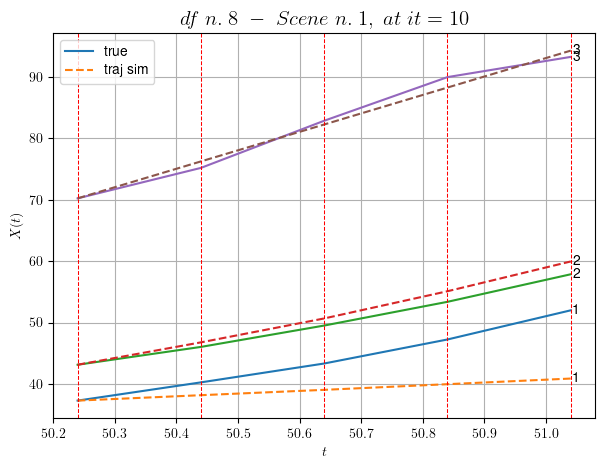

        For scene 1/21
        * use LR_NN=0.0001 with err=14.326761992758849 at it=24
        * v0_scn_mean = 30.021664854650965
        * MAE = 14.225470468657202



df n.8, scene n.2/21
    We have 4 time intervals inside [102.24,103.04]
            - Time interval n.0: [102.24, 102.44]
                * y_true: [22.78095819 15.94092959]
                * v_ann: [13.430081367492676, 15.798583030700684, 30.354547721461635]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [102.44, 102.64]
                * y_true: [23.36120187 12.10080168]
                * v_ann: [12.79465103149414, 24.388124465942383, 30.354547721461635]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [102.64, 102.84]
                * y_true: [20.51121756 22.37162153]
                * v_ann: [8.835762023925781, 25.53249740600586, 30.35454772146

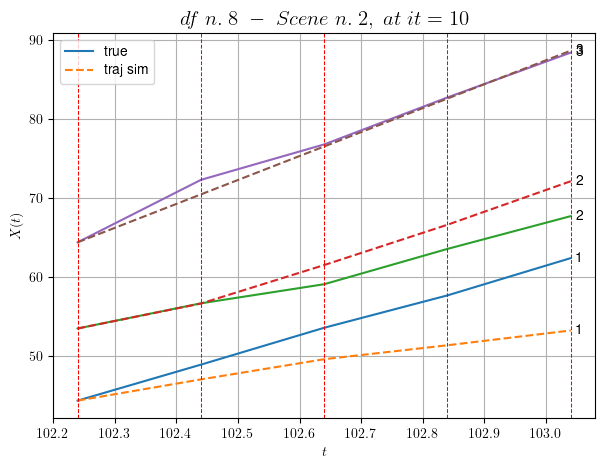

        For scene 2/21
        * use LR_NN=0.001 with err=11.463103395164119 at it=24
        * v0_scn_mean = 30.18527444734179
        * MAE = 12.1161039560982



df n.8, scene n.3/21
    We have 3 time intervals inside [108.84,109.44]
            - Time interval n.0: [108.84, 109.04]
                * y_true: [17.9810803  26.65193678]
                * v_ann: [8.759089469909668, 26.946292877197266, 27.514762975052275]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [109.04, 109.24]
                * y_true: [14.30252156 22.9019425 ]
                * v_ann: [11.881670951843262, 24.735313415527344, 27.514762975052275]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [109.24, 109.44]
                * y_true: [21.24158827 21.25204953]
                * v_ann: [14.289460182189941, 21.594982147216797, 27.5147629750522

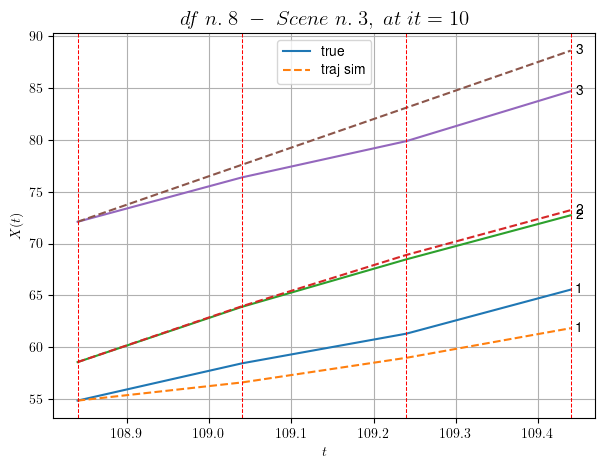

        For scene 3/21
        * use LR_NN=0.001 with err=6.362652609571857 at it=24
        * v0_scn_mean = 28.701300591039267
        * MAE = 4.190484218968269



df n.8, scene n.4/21
    We have 2 time intervals inside [130.04,130.44]
            - Time interval n.0: [130.04, 130.24]
                * y_true: [23.9806113  21.72216875]
                * v_ann: [28.357053756713867, 6.37606143951416, 32.90719350557061]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [130.24, 130.44]
                * y_true: [20.38064152 27.22317612]
                * v_ann: [26.31067657470703, 8.583131790161133, 32.90719350557061]

----------------------------------------------------------------------------------------------------
    * err= 8.285422037502528
    * Learning rate NN = 0.00036449998151510954
    * diff = 12.078296813518062


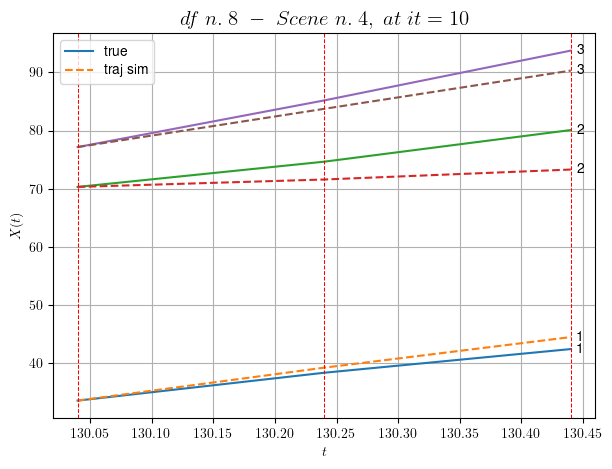

        For scene 4/21
        * use LR_NN=0.0005 with err=9.80547365175863 at it=24
        * v0_scn_mean = 31.519199355843597
        * MAE = 8.285422037502528



df n.8, scene n.5/21
    We have 5 time intervals inside [215.24,216.24]
            - Time interval n.0: [215.24, 215.44]
                * y_true: [ 1.34614625 10.42531549]
                * v_ann: [4.778215408325195, 22.57927703857422, 26.08206781967576]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [215.44, 215.64]
                * y_true: [18.28906766 10.32533879]
                * v_ann: [4.368098258972168, 14.333325386047363, 26.08206781967576]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [215.64, 215.84]
                * y_true: [29.02100933 15.78058213]
                * v_ann: [3.703273057937622, 15.537229537963867, 26.08206781967576]



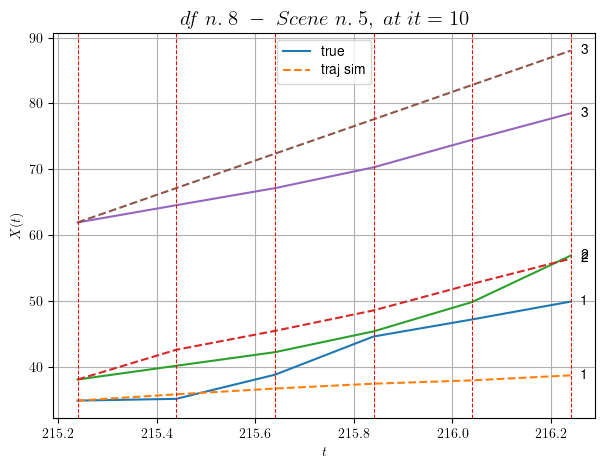

        For scene 5/21
        * use LR_NN=0.001 with err=40.69131327355669 at it=24
        * v0_scn_mean = 27.952623369176564
        * MAE = 30.458719089398993



df n.8, scene n.6/21
    We have 4 time intervals inside [222.64,223.44]
            - Time interval n.0: [222.64, 222.84]
                * y_true: [3.4148313  7.54419185]
                * v_ann: [1.8205243349075317, 5.857788562774658, 25.379397157043503]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [222.84, 223.04]
                * y_true: [1.34614625 9.61287691]
                * v_ann: [1.96128511428833, 5.877511501312256, 25.379397157043503]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [223.04, 223.24]
                * y_true: [ 1.34614625 10.20300693]
                * v_ann: [2.207179069519043, 5.90498161315918, 25.379397157043503]

---

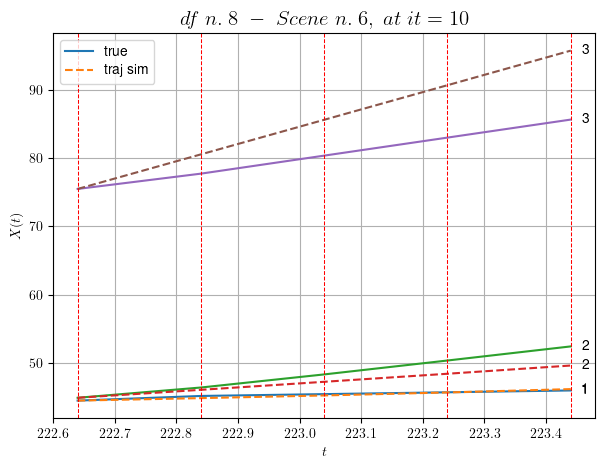

        For scene 6/21
        * use LR_NN=0.0005 with err=25.35235466424 at it=24
        * v0_scn_mean = 27.585431843742896
        * MAE = 14.025671027400472



df n.8, scene n.7/21
    We have 5 time intervals inside [225.24,226.24]
            - Time interval n.0: [225.24, 225.44]
                * y_true: [9.85023046 1.34614625]
                * v_ann: [5.200186729431152, 7.567868709564209, 25.56745221572693]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [225.44, 225.64]
                * y_true: [11.30531094  1.34614625]
                * v_ann: [4.761070251464844, 8.172102928161621, 25.56745221572693]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [225.64, 225.84]
                * y_true: [12.27536459  1.34614625]
                * v_ann: [4.258692741394043, 8.73143196105957, 25.56745221572693]

------

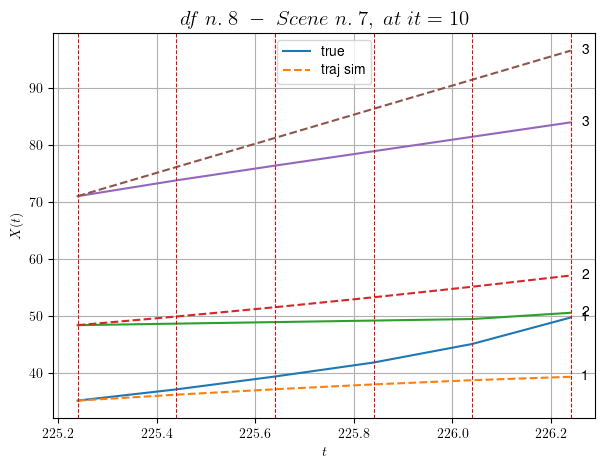

        For scene 7/21
        * use LR_NN=5e-05 with err=51.71396759506387 at it=24
        * v0_scn_mean = 27.68370295072898
        * MAE = 34.0780568352602



df n.8, scene n.8/21
    We have 4 time intervals inside [227.04,227.84]
            - Time interval n.0: [227.04, 227.24]
                * y_true: [ 1.34614625 11.86069537]
                * v_ann: [3.356588125228882, 7.128767013549805, 29.012097760641318]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [227.24, 227.44]
                * y_true: [ 1.34614625 11.90074479]
                * v_ann: [4.054165363311768, 7.735592842102051, 29.012097760641318]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [227.44, 227.64]
                * y_true: [ 1.34614625 14.03099458]
                * v_ann: [4.734067440032959, 9.159144401550293, 29.012097760641318]

-

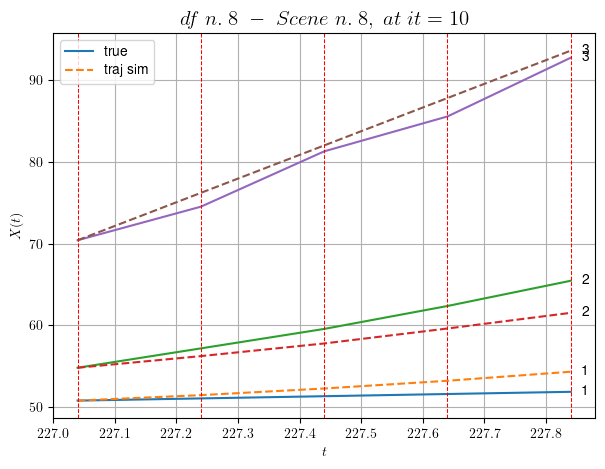

        For scene 8/21
        * use LR_NN=0.0005 with err=2.8835997285093704 at it=24
        * v0_scn_mean = 29.483756260876874
        * MAE = 3.0684172777349676



df n.8, scene n.9/21
    We have 2 time intervals inside [237.64,238.04]
            - Time interval n.0: [237.64, 237.84]
                * y_true: [17.80043487 10.22573725]
                * v_ann: [18.707778930664062, 7.120784282684326, 29.921892141998057]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [237.84, 238.04]
                * y_true: [20.29063338 11.60088234]
                * v_ann: [16.635372161865234, 8.927557945251465, 29.921892141998057]

----------------------------------------------------------------------------------------------------
    * err= 0.25052375263075927
    * Learning rate NN = 0.00036449998151510954
    * diff = 1.6886229010542435


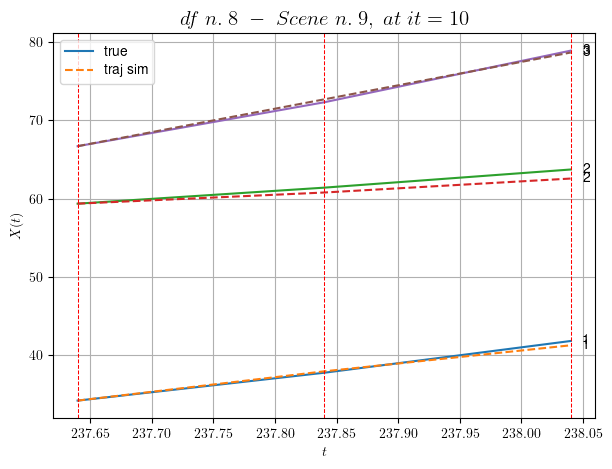

        For scene 9/21
        * use LR_NN=0.0005 with err=0.48692621350668813 at it=24
        * v0_scn_mean = 29.95918351931666
        * MAE = 0.25052375263075927



df n.8, scene n.10/21
    We have 2 time intervals inside [239.84,240.24]
            - Time interval n.0: [239.84, 240.04]
                * y_true: [16.30079237 13.85576065]
                * v_ann: [4.342009544372559, 16.999984741210938, 30.034510832929175]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [240.04, 240.24]
                * y_true: [17.06097057 17.27611431]
                * v_ann: [4.088187217712402, 17.89145278930664, 30.034510832929175]

----------------------------------------------------------------------------------------------------
    * err= 3.517426313200678
    * Learning rate NN = 0.00036449998151510954
    * diff = 0.6314421917717392


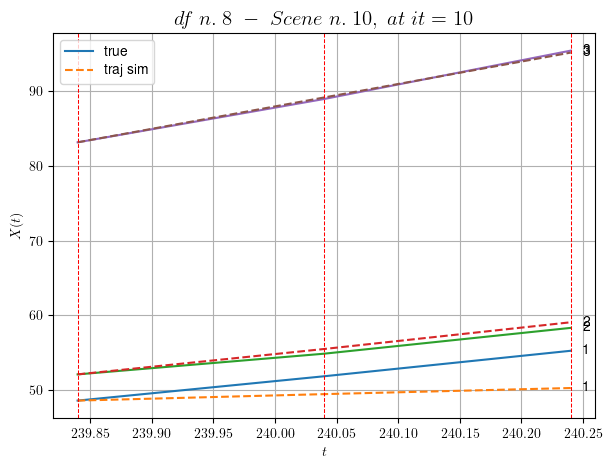

        For scene 10/21
        * use LR_NN=0.0005 with err=4.563226000021692 at it=24
        * v0_scn_mean = 30.01803417455877
        * MAE = 3.517426313200678



df n.8, scene n.11/21
    We have 4 time intervals inside [243.44,244.24]
            - Time interval n.0: [243.44, 243.64]
                * y_true: [18.26109982  7.28715228]
                * v_ann: [0.03697860240936279, 0.0004589826276060194, 26.51390826548153]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [243.64, 243.84]
                * y_true: [23.05153691  9.06731774]
                * v_ann: [0.16674929857254028, 0.0001758204452926293, 26.51390826548153]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [243.84, 244.04]
                * y_true: [10.52334632 16.05532609]
                * v_ann: [1.041684627532959, 0.00010302048758603632, 26.

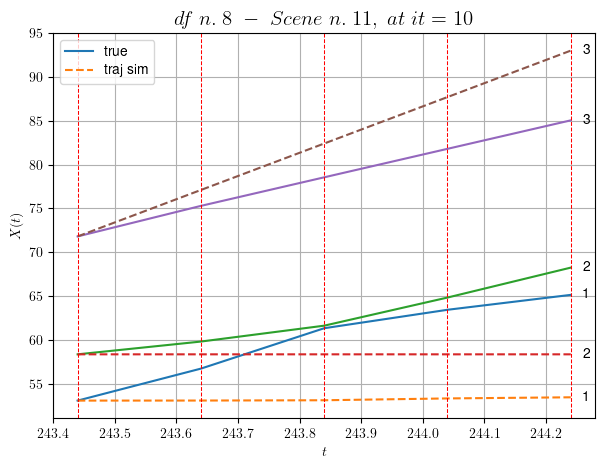

        For scene 11/21
        * use LR_NN=0.005 with err=23.71499237356639 at it=24
        * v0_scn_mean = 28.178288336382252
        * MAE = 27.08652828979238



df n.8, scene n.12/21
    We have 5 time intervals inside [251.64,252.64]
            - Time interval n.0: [251.64, 251.84]
                * y_true: [14.32016282 17.2315068 ]
                * v_ann: [1.4482132826287852e-08, 0.20882144570350647, 27.324350803257573]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [251.84, 252.04]
                * y_true: [20.34029568 17.65159646]
                * v_ann: [1.2206374577772294e-08, 0.192834734916687, 27.324350803257573]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [252.04, 252.24]
                * y_true: [20.93040622 16.61174803]
                * v_ann: [1.6476029429668415e-08, 0.13462872803211212,

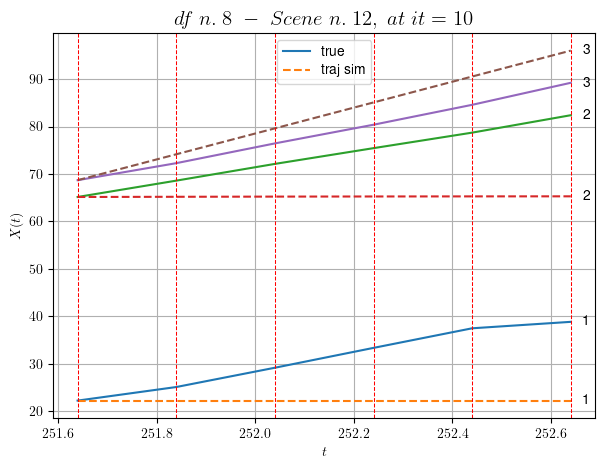

        For scene 12/21
        * use LR_NN=0.0005 with err=35.241961571056414 at it=24
        * v0_scn_mean = 28.601797737795806
        * MAE = 80.10632521280975



df n.8, scene n.13/21
    We have 3 time intervals inside [290.84,291.44]
            - Time interval n.0: [290.84, 291.04]
                * y_true: [10.67508652 21.71084933]
                * v_ann: [8.756585884839296e-05, 1.0235204399577924e-06, 28.78466016261446]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [291.04, 291.24]
                * y_true: [ 9.47510968 18.71084105]
                * v_ann: [3.606367317843251e-05, 8.245903018178069e-07, 28.78466016261446]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [291.24, 291.44]
                * y_true: [ 9.47510968 24.76138307]
                * v_ann: [1.716315637168009e-05, 2.45021794853528

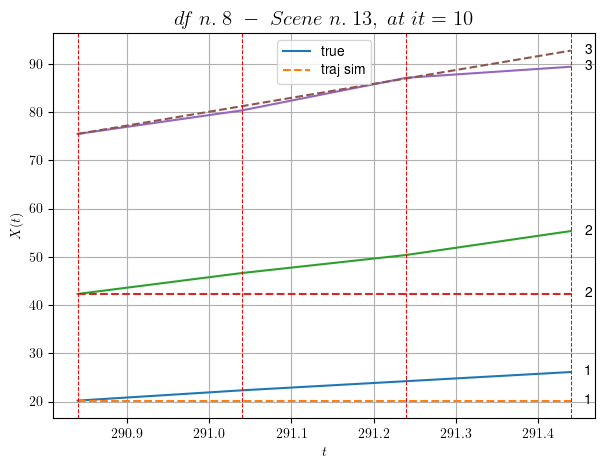

        For scene 13/21
        * use LR_NN=0.0005 with err=2.350331999271176 at it=24
        * v0_scn_mean = 29.36490519308442
        * MAE = 26.833541344166445



df n.8, scene n.14/21
    We have 5 time intervals inside [350.64,351.64]
            - Time interval n.0: [350.64, 350.84]
                * y_true: [14.24956692  9.34769854]
                * v_ann: [1.7529404163360596, 8.839941024780273, 28.42685271144151]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [350.84, 351.04]
                * y_true: [ 4.06677119 24.77080184]
                * v_ann: [1.9903157949447632, 11.240758895874023, 28.42685271144151]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [351.04, 351.24]
                * y_true: [15.46321179 18.97073364]
                * v_ann: [2.6578261852264404, 12.015606880187988, 28.42685271144

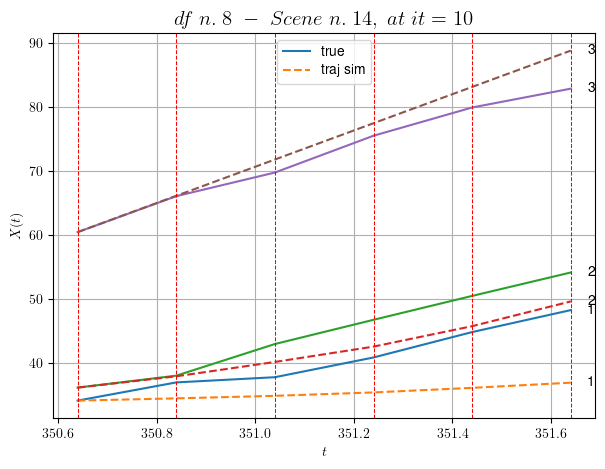

        For scene 14/21
        * use LR_NN=0.001 with err=13.963543092538776 at it=24
        * v0_scn_mean = 29.1779273230882
        * MAE = 20.70042313790074



df n.8, scene n.15/21
    We have 3 time intervals inside [368.84,369.44]
            - Time interval n.0: [368.84, 369.04]
                * y_true: [17.45059381  8.87536169]
                * v_ann: [2.645571231842041, 12.679980278015137, 26.584670376712012]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [369.04, 369.24]
                * y_true: [23.11801305  8.05829994]
                * v_ann: [2.2975993156433105, 14.106245994567871, 26.584670376712012]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [369.24, 369.44]
                * y_true: [ 6.12528304 15.69072344]
                * v_ann: [2.677678108215332, 15.653578758239746, 26.584670376712

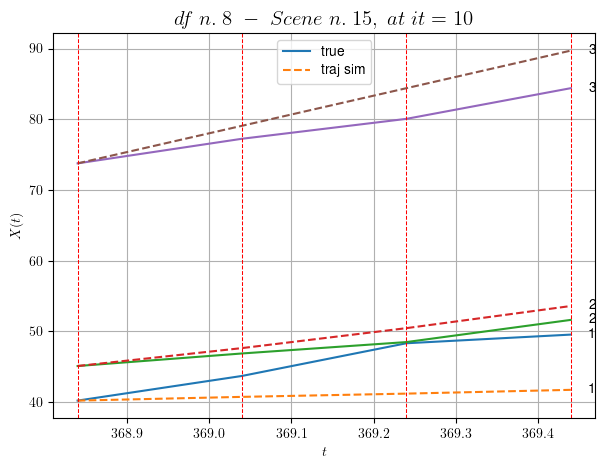

        For scene 15/21
        * use LR_NN=0.0005 with err=19.087089313652463 at it=24
        * v0_scn_mean = 28.215266182402377
        * MAE = 14.944591057665052



df n.8, scene n.16/21
    We have 2 time intervals inside [414.44,414.84]
            - Time interval n.0: [414.44, 414.64]
                * y_true: [25.58017481 23.93124381]
                * v_ann: [22.808866500854492, 20.506441116333008, 25.98728077190395]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [414.64, 414.84]
                * y_true: [28.7103211   9.12051681]
                * v_ann: [23.291589736938477, 20.13846206665039, 25.98728077190395]

----------------------------------------------------------------------------------------------------
    * err= 3.667944439850008
    * Learning rate NN = 7.289998757187277e-05
    * diff = 5.111314567537677


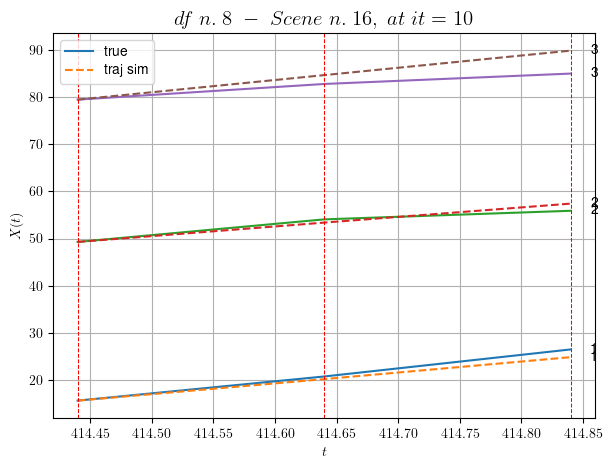

        For scene 16/21
        * use LR_NN=0.0001 with err=6.100857278496597 at it=24
        * v0_scn_mean = 27.903090917469626
        * MAE = 3.667944439850008



df n.8, scene n.17/21
    We have 5 time intervals inside [477.84,478.84]
            - Time interval n.0: [477.84, 478.04]
                * y_true: [17.90015387 15.74042221]
                * v_ann: [12.465551376342773, 21.151456832885742, 27.70386959065661]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [478.04, 478.24]
                * y_true: [18.02021575 17.32056356]
                * v_ann: [12.121438980102539, 21.742284774780273, 27.70386959065661]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [478.24, 478.44]
                * y_true: [20.95033635 22.3908747 ]
                * v_ann: [12.002206802368164, 21.775169372558594, 27.7038695906

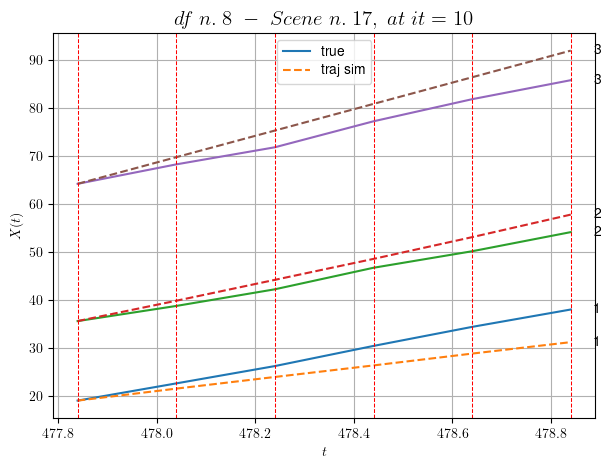

        For scene 17/21
        * use LR_NN=5e-05 with err=15.937314550705418 at it=24
        * v0_scn_mean = 28.80012120551221
        * MAE = 12.005431055740138



df n.8, scene n.18/21
    We have 2 time intervals inside [522.64,523.04]
            - Time interval n.0: [522.64, 522.84]
                * y_true: [ 6.78505349 16.71042372]
                * v_ann: [7.019962310791016, 16.467105865478516, 28.72621153398683]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [522.84, 523.04]
                * y_true: [ 7.85007105 23.28071684]
                * v_ann: [7.77302885055542, 17.138338088989258, 28.72621153398683]

----------------------------------------------------------------------------------------------------
    * err= 0.5952244099310195
    * Learning rate NN = 7.289998757187277e-05
    * diff = 1.4532136977567267


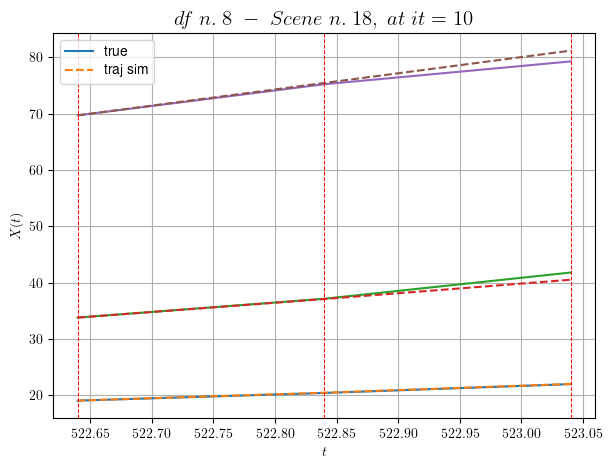

        For scene 18/21
        * use LR_NN=0.0001 with err=0.8975363505418886 at it=24
        * v0_scn_mean = 29.33436194964632
        * MAE = 0.5952244099310195



df n.8, scene n.19/21
    We have 7 time intervals inside [593.04,594.44]
            - Time interval n.0: [593.04, 593.24]
                * y_true: [18.14041096 18.46062677]
                * v_ann: [13.674680709838867, 16.311342239379883, 27.448712767914373]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [593.24, 593.44]
                * y_true: [15.67042287 23.16095213]
                * v_ann: [14.299638748168945, 15.828575134277344, 27.448712767914373]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [593.44, 593.64]
                * y_true: [13.25043489 21.00101152]
                * v_ann: [17.785322189331055, 17.47895622253418, 27.44871276

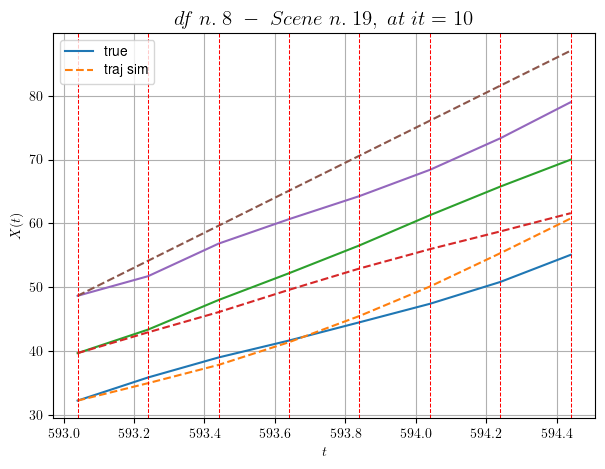

        For scene 19/21
        * use LR_NN=0.001 with err=30.914128266625582 at it=24
        * v0_scn_mean = 28.666785024068872
        * MAE = 20.89685718583552



df n.8, scene n.20/21
    We have 4 time intervals inside [256.44,257.24]
            - Time interval n.0: [256.44, 256.64]
                * y_true: [ 7.48303167 10.07767618 21.73093279]
                * v_ann: [5.568721771240234, 5.5699920654296875, 19.947917938232422, 27.372297259239744]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [256.64, 256.84]
                * y_true: [13.09283525 13.17831107 21.42106847]
                * v_ann: [5.541095733642578, 5.613033294677734, 16.68389892578125, 27.372297259239744]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [256.84, 257.04]
                * y_true: [11.5255681  16.82586504 17.99104223]
     

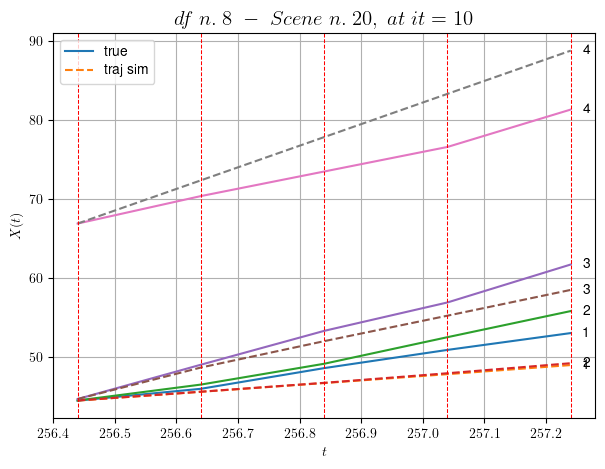

        For scene 20/21
        * use LR_NN=0.001 with err=14.405265036125153 at it=24
        * v0_scn_mean = 28.641835652476363
        * MAE = 11.973301256103909



For df=8 with 21 scenes, time taken:        108.18
****************************************************************************************************
****************************************************************************************************
In df n.9/2 we have 9 scenes
df n.9, scene n.0/9
    We have 3 time intervals inside [5.40,6.00]
            - Time interval n.0: [5.40, 5.60]
                * y_true: [17.46255149 32.38946228]
                * v_ann: [25.09836769104004, 9.824235916137695, 29.75836733064682]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [5.60, 5.80]
                * y_true: [27.89361325 30.52270411]
                * v_ann: [28.983686447143555, 10.080735206604004, 29.75836733064682]

---------------

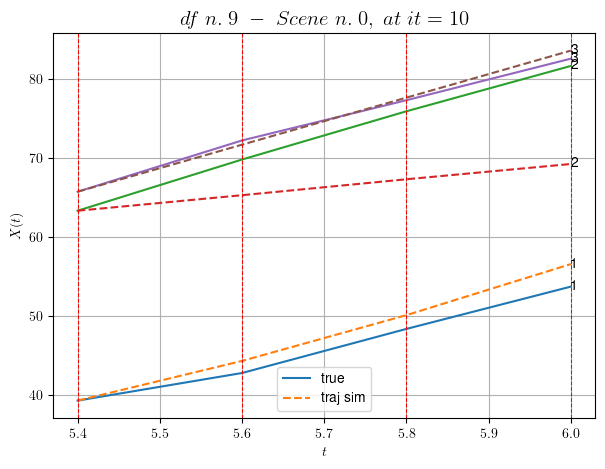

        For scene 0/9
        * use LR_NN=0.0005 with err=35.155242250650815 at it=24
        * v0_scn_mean = 29.873731076060572
        * MAE = 21.934711892198823



df n.9, scene n.1/9
    We have 2 time intervals inside [20.80,21.20]
            - Time interval n.0: [20.80, 21.00]
                * y_true: [29.01888251 26.46522664]
                * v_ann: [11.849040985107422, 26.03460121154785, 30.718753357486165]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [21.00, 21.20]
                * y_true: [29.93697896 25.84808908]
                * v_ann: [12.019859313964844, 31.038511276245117, 30.718753357486165]

----------------------------------------------------------------------------------------------------
    * err= 7.043408528640743
    * Learning rate NN = 0.00036449998151510954
    * diff = 1.9748182264768044


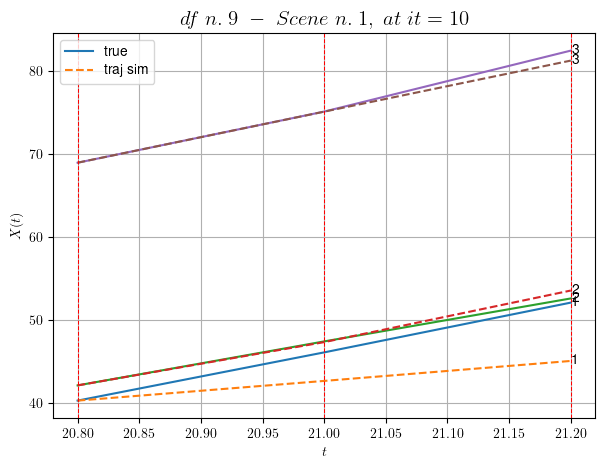

        For scene 1/9
        * use LR_NN=0.0005 with err=14.751251446471064 at it=24
        * v0_scn_mean = 30.37559578872581
        * MAE = 7.043408528640743



df n.9, scene n.2/9
    We have 6 time intervals inside [37.80,39.00]
            - Time interval n.0: [37.80, 38.00]
                * y_true: [21.35828745 27.25004814]
                * v_ann: [19.559768676757812, 14.558207511901855, 28.327320804683463]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [38.00, 38.20]
                * y_true: [19.23626153 17.91519282]
                * v_ann: [25.056514739990234, 16.300874710083008, 28.327320804683463]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [38.20, 38.40]
                * y_true: [24.96063116 28.62771944]
                * v_ann: [21.33039093017578, 15.504791259765625, 28.327320804683463]

---

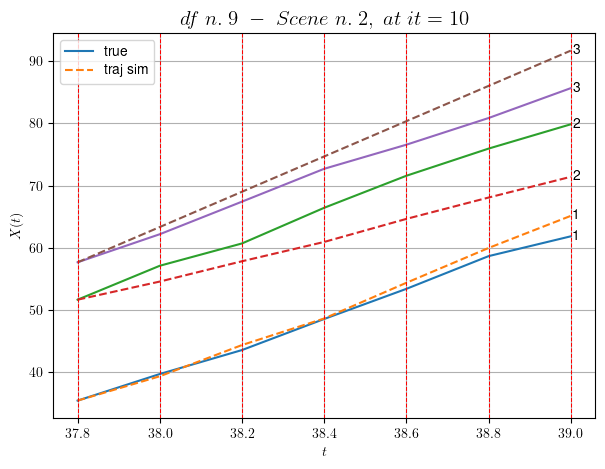

        For scene 2/9
        * use LR_NN=0.001 with err=42.918575492760425 at it=24
        * v0_scn_mean = 29.125915371237397
        * MAE = 15.467853045696652



df n.9, scene n.3/9
    We have 2 time intervals inside [44.40,44.80]
            - Time interval n.0: [44.40, 44.60]
                * y_true: [24.95803839 22.94664651]
                * v_ann: [20.625656127929688, 29.086715698242188, 26.848707765794494]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [44.60, 44.80]
                * y_true: [22.38974011 30.85088397]
                * v_ann: [19.905920028686523, 27.746484756469727, 26.848707765794494]

----------------------------------------------------------------------------------------------------
    * err= 2.3427929198223394
    * Learning rate NN = 7.289998757187277e-05
    * diff = 2.0237441206799813


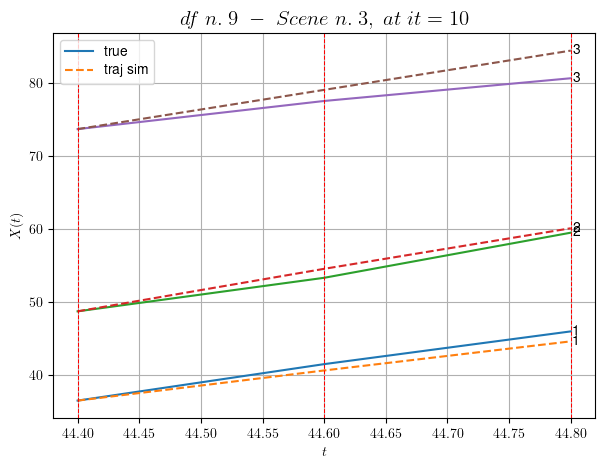

        For scene 3/9
        * use LR_NN=0.0001 with err=5.468178616912559 at it=24
        * v0_scn_mean = 28.353243042437242
        * MAE = 2.3427929198223394



df n.9, scene n.4/9
    We have 3 time intervals inside [117.80,118.40]
            - Time interval n.0: [117.80, 118.00]
                * y_true: [26.21501314 26.51617559]
                * v_ann: [18.406173706054688, 26.576255798339844, 30.775162112177814]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [118.00, 118.20]
                * y_true: [24.27291409 32.45579962]
                * v_ann: [19.126371383666992, 28.829118728637695, 30.775162112177814]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [118.20, 118.40]
                * y_true: [21.96072195 23.86482679]
                * v_ann: [20.7869815826416, 30.638826370239258, 30.7751621121778

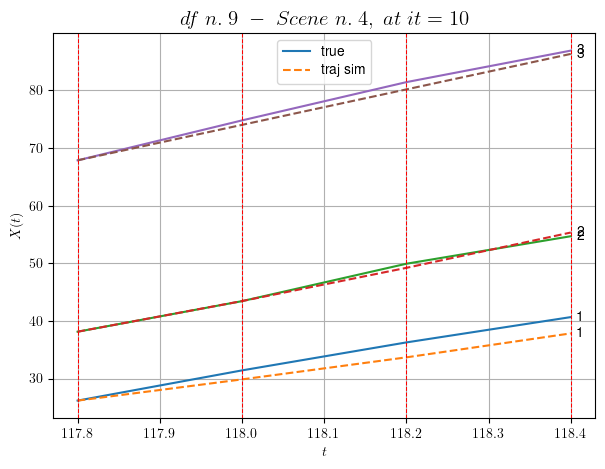

        For scene 4/9
        * use LR_NN=0.0001 with err=7.687485937138168 at it=24
        * v0_scn_mean = 30.405073064190027
        * MAE = 1.7145049866292597



df n.9, scene n.5/9
    We have 2 time intervals inside [119.20,119.60]
            - Time interval n.0: [119.20, 119.40]
                * y_true: [23.20444186 22.52067771]
                * v_ann: [25.966012954711914, 24.718576431274414, 29.141325655316802]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [119.40, 119.60]
                * y_true: [27.39348249 26.5570173 ]
                * v_ann: [24.826900482177734, 24.38982391357422, 29.141325655316802]

----------------------------------------------------------------------------------------------------
    * err= 0.19331839782123308
    * Learning rate NN = 7.289998757187277e-05
    * diff = 0.6847770874100444


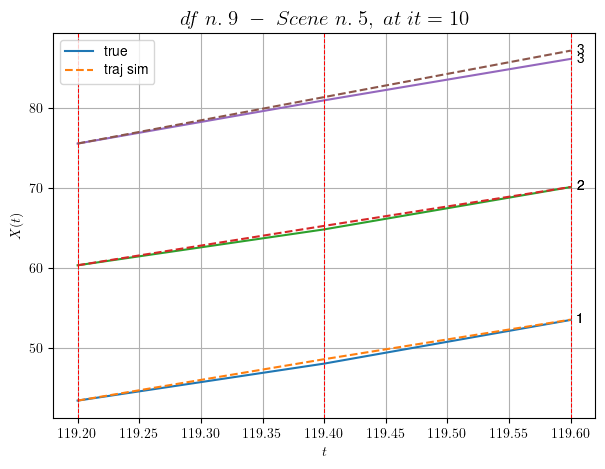

        For scene 5/9
        * use LR_NN=0.0001 with err=0.2932353361858054 at it=24
        * v0_scn_mean = 29.551286314852327
        * MAE = 0.19331839782123308



df n.9, scene n.6/9
    We have 2 time intervals inside [120.20,120.60]
            - Time interval n.0: [120.20, 120.40]
                * y_true: [30.48045094 26.16776015]
                * v_ann: [23.704431533813477, 27.9418888092041, 29.302888008462972]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [120.40, 120.60]
                * y_true: [26.23623075 25.12734403]
                * v_ann: [24.899154663085938, 29.81224822998047, 29.302888008462972]

----------------------------------------------------------------------------------------------------
    * err= 0.7795346753439037
    * Learning rate NN = 7.289998757187277e-05
    * diff = 0.7132435944230316


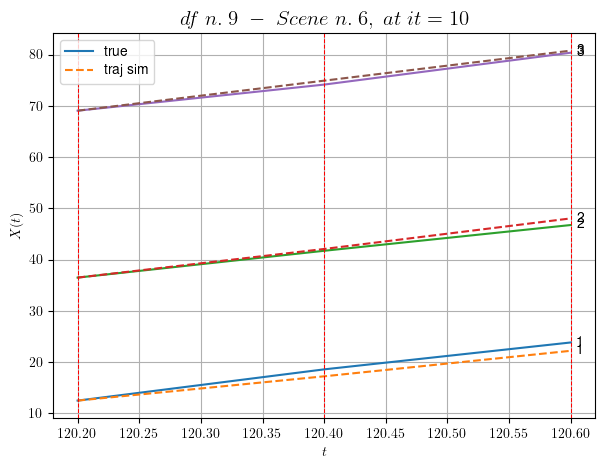

        For scene 6/9
        * use LR_NN=0.0001 with err=1.5831046321521145 at it=24
        * v0_scn_mean = 29.635713244933818
        * MAE = 0.7795346753439037



df n.9, scene n.7/9
    We have 3 time intervals inside [121.40,122.00]
            - Time interval n.0: [121.40, 121.60]
                * y_true: [23.88369588 31.34452269]
                * v_ann: [18.45423698425293, 31.990554809570312, 29.646982819348388]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [121.60, 121.80]
                * y_true: [22.66516063 24.1738881 ]
                * v_ann: [17.397554397583008, 22.957748413085938, 29.646982819348388]

----------------------------------------------------------------------------------------------------
            - Time interval n.2: [121.80, 122.00]
                * y_true: [27.39865086 24.79107704]
                * v_ann: [18.219247817993164, 25.541048049926758, 29.64698281934

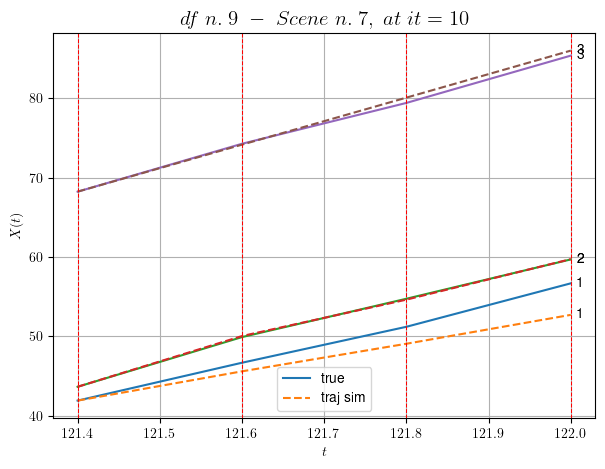

        For scene 7/9
        * use LR_NN=0.001 with err=15.716235182345217 at it=24
        * v0_scn_mean = 29.81552536065456
        * MAE = 1.8706905228111974



df n.9, scene n.8/9
    We have 2 time intervals inside [205.80,206.20]
            - Time interval n.0: [205.80, 206.00]
                * y_true: [16.81767795  9.52209489]
                * v_ann: [12.641039848327637, 11.819904327392578, 28.200994541779387]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [206.00, 206.20]
                * y_true: [13.65726133  9.1692133 ]
                * v_ann: [12.354238510131836, 12.628495216369629, 28.200994541779387]

----------------------------------------------------------------------------------------------------
    * err= 0.9277323479278317
    * Learning rate NN = 7.289998757187277e-05
    * diff = 5.859603528732412


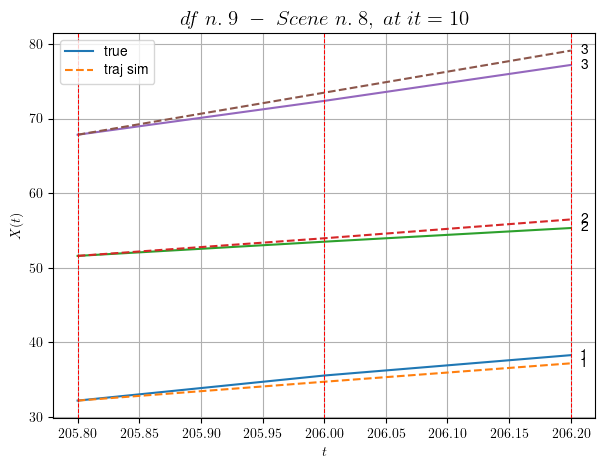

        For scene 8/9
        * use LR_NN=0.0001 with err=1.3201611078244369 at it=24
        * v0_scn_mean = 29.05990161024683
        * MAE = 0.9277323479278317



For df=9 with 9 scenes, time taken:        37.46
****************************************************************************************************

Time taken for the computation: 145.63
----------------------------------------------------------------------------------------------------


In [6]:
info_dataset = solve_nn_dataset(model, v0_guess, dataset, NUM_ITER, LEARNING_RATE_v0=0.5)

## Plot

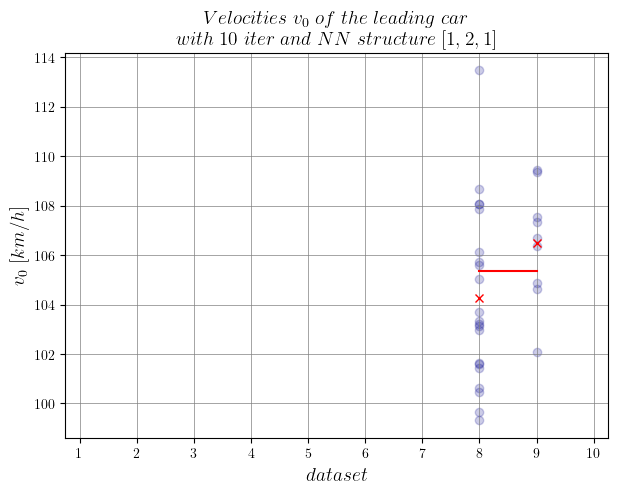

In [7]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

for _, scn in info_dataset.iterrows():

    # Convert velocities to km/h
    v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

    # For each scene, plot v0 mean (averagin over iterations)
    ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

# For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
for nf, p in info_grouped.iterrows():
    ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

# Plot v0 mean over all dfs
alldfs = [a for a, _ in info_grouped.iterrows()]
v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')  

ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$"
               "\n"  # Newline: the backslash is interpreted as usual
             fr"$with\ {NUM_ITER}\ iter\ and\ NN\ structure\ {str(DOE[0])}$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

> **WARNING**: The maximal km speed allowed on the highway is 100 h

### Initialize the output dir

In [8]:
# Prepare the directory..
if flag_save:
    
    df_seen = [df['N. file'][0] for df in dataset]
    df_seen_str = '-'.join(str(x) for x in df_seen)
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_df{df_seen_str}_{NUM_ITER}it")
    
    path = 'out/' + d
    os.mkdir(path)

In [9]:
# Save figure
if flag_save:
    
    ext = ".svg"
    
#     xs = DOE[0]
#     s = ''.join(str(x) for x in xs)
    
    title = f"/v0_df{df_seen_str}_{NUM_ITER}it"
    
    fig.savefig(path+title+ext, bbox_inches='tight')

### Store data in .txt

In [10]:
# Save the solution in a file
if flag_save:
    
    namefile = '/info_dataset.txt'

    with open(path + namefile, 'w') as output:
        info_dataset.to_csv(path + namefile, sep=',', index=False)

### Load back the df

In [11]:
# path + namefile
# colnames = ['t_list', 'x_list', 'v_list', 'v0_scn', 'v0_scn_mean', 'n_scn', 'N. file', 'iter', 'DOE', 'processed']
# A = pd.read_csv(path + namefile, sep=',', usecols= colnames)